In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dat=pd.read_csv("project_pop_color_hsl_200.csv")

dat.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
dat.fillna(value=0,inplace=True)
#dat.sort_values(by='time')


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, deltaE_cie76,lab2rgb

palette=pd.read_csv("rgb.txt",header=0,sep='#')
for index, row in palette.iterrows():
    row['colorname']=row['colorname'][:-1]
    row['hexcode']='#'+row['hexcode'][:-1]
    

hexcode=palette['hexcode']
colorname=palette['colorname']
def hex2rgb(hexcode):
    h= hexcode.lstrip('#')
    return np.array([int(h[i:i+2], 16) for i in (0, 2, 4)],dtype='uint8')

hexcode_lab=np.empty((0,3),dtype='uint8')
for p in hexcode:
    p_lab=(rgb2lab(hex2rgb(p))).reshape((1,3))
    hexcode_lab=np.append(hexcode_lab,p_lab,axis=0)
    
colorcode=pd.read_excel("NewMicrosoftExcelWorksheet.xlsx")
colorcode=colorcode.rename(columns={'Hex Equivalent':'colorname','Unnamed: 1':'hexcode'})
colorcode.iloc[8]["hexcode"]='#F0F8FF'
color_136=np.empty((136,3))
for i in range(136):
    color_136[i]=hex2rgb(colorcode['hexcode'][i])
color_136=color_136.astype('uint8')

FileNotFoundError: [Errno 2] No such file or directory: 'NewMicrosoftExcelWorksheet.xlsx'

In [98]:
color_949_to_136=[]
for i in range(949):
    color_949_to_136.append(
        np.argmin(deltaE_cie76(hexcode_lab[i],rgb2lab(color_136))))

In [99]:
column=['time']
column.extend([i for i in range(136)])
color_time_136=pd.DataFrame(columns=column)
color_time_136['time']=dat['time']
#color_time_136.fillna(value=0,inplace=True)

for i in range(136):
    for j in range(949):
        if color_949_to_136[j]==i:
           # print(j,i)
            color_time_136[i]=np.asarray(color_time_136[i])+np.asarray(dat[str(j)])

In [101]:
#color_time_136.fillna(value=0,inplace=True)

In [114]:
#color_time_136=color_time_136.sort_values('time')
#color_time_136

In [110]:
start=pd.to_datetime('2010/12')
end=pd.to_datetime('2020/04')
x=dat[pd.to_datetime(dat['time'])>start].copy()
x=x[pd.to_datetime(x['time'])<end]

In [20]:
x=x.sort_values('time')
x=x.fillna(value=0)

In [118]:
x_day=x.groupby('time').sum()
#color_time_136=pd.DataFrame(columns=column)
#color_time_136
#x_day

In [203]:
column=['time']
column.extend([i for i in range(136)])
color_time_136=pd.DataFrame(columns=column)
color_time_136['time']=x_day.index
color_time_136.fillna(value=0,inplace=True)  #important!!!!

for i in range(136):
    for j in range(949):
        if color_949_to_136[j]==i:
            #print(j,i)
            color_time_136[i]=np.asarray(color_time_136[i])+np.asarray(x_day[str(j)])

In [204]:
color_time_136.fillna(value=0,inplace=True)

In [205]:
color_time_136.head()

,time,0,1,2,3,4,5,6,7,8,...,126,127,128,129,130,131,132,133,134,135
0,2010/12/02,80.0,0.0,0.0,0.0,0.0,0.0,26.0,1485.0,0,...,28724.0,210.0,1123.0,65.0,0.0,0.0,0.0,0.0,0,0.0
1,2010/12/03,10.0,0.0,0.0,0.0,0.0,0.0,0.0,1582.0,0,...,2644.0,0.0,239.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,2010/12/04,0.0,0.0,0.0,0.0,0.0,0.0,173.0,202.0,0,...,6306.0,442.0,74.0,357.0,0.0,0.0,0.0,86.0,0,1.0
3,2010/12/05,289.0,0.0,11.0,3.0,0.0,0.0,3.0,2157.0,0,...,22633.0,652.0,25.0,0.0,0.0,0.0,0.0,401.0,0,2.0
4,2010/12/06,222.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0,0,...,1615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [440]:
x_week=color_time_136.copy()
x_week['time']=pd.to_datetime(x_week['time']) - pd.to_timedelta(7, unit='d')
x_week = x_week.groupby(pd.Grouper(key='time', freq='W-MON')).sum().reset_index().sort_values('time')
x_week.head()

,time,0,1,2,3,4,5,6,7,8,...,127,128,129,130,131,132,133,134,135,tot
0,2010-11-29,601.0,0.0,11.0,3.0,0.0,0.0,202.0,7423.0,0,...,1304.0,1461.0,422.0,0.0,0.0,0.0,487.0,0,3.0,577248.0
1,2010-12-06,1022.0,0.0,4.0,0.0,0.0,0.0,280.0,23406.0,0,...,5050.0,4720.0,250.0,0.0,1.0,0.0,299.0,0,0.0,530795.0
2,2010-12-13,2001.0,0.0,0.0,496.0,93.0,83.0,173.0,19096.0,0,...,11031.0,1691.0,1127.0,0.0,741.0,0.0,197.0,0,655.0,702007.0
3,2010-12-20,1259.0,0.0,0.0,0.0,0.0,1871.0,1218.0,37722.0,0,...,32910.0,295.0,289.0,3.0,0.0,1.0,2091.0,0,0.0,1000289.0
4,2010-12-27,2781.0,0.0,5.0,0.0,0.0,0.0,12355.0,49949.0,0,...,9492.0,8625.0,587.0,3.0,31.0,3901.0,269.0,0,0.0,1223470.0


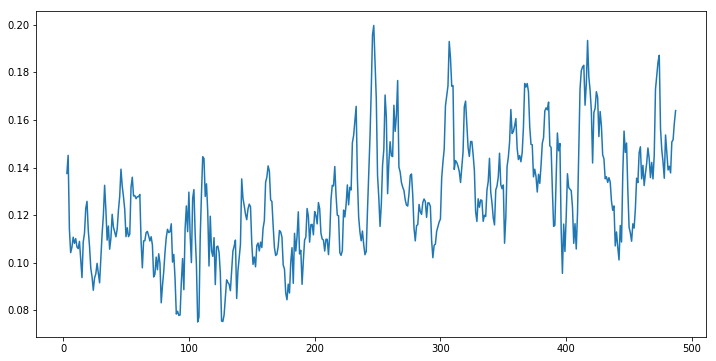

In [445]:
feature=x_week[41]/x_week['tot']
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(feature.rolling(4).mean())#[30:100])



In [296]:
yy=y.rolling(8).mean()
print(yy.std())
removed_outliers = yy.between(yy.quantile(.05), yy.quantile(.95))

0.020856571109056983


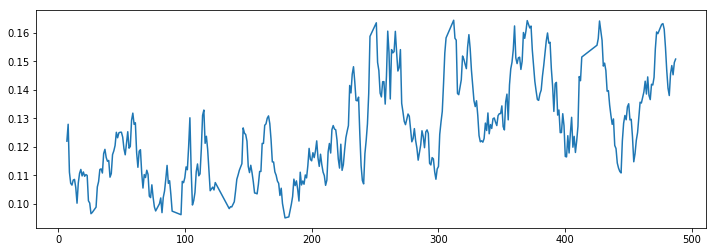

In [297]:
#plt.hist(yy[removed_outliers],bins=50)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(yy[removed_outliers])

In [298]:
for i in range(len(yy)):
    if yy[i]<yy.quantile(.05):
        yy[i]=yy.quantile(.05)
    if yy[i]>yy.quantile(.95):
        yy[i]=yy.quantile(.95)
    


In [289]:
yy.quantile(.05)

0.09161831832651869

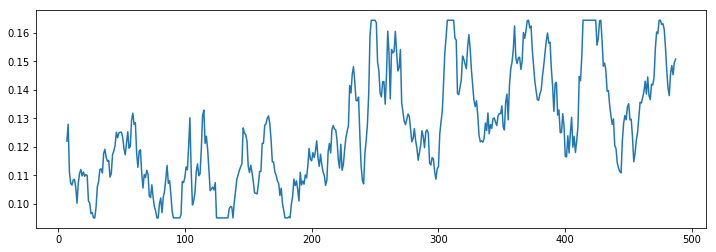

In [299]:
#plt.hist(yy[removed_outliers],bins=50)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(yy)

In [270]:
#y.rolling(28).mean()

In [26]:
x_day.index=pd.to_datetime(x_day.index)

In [206]:
color_time_136['tot']=color_time_136.iloc[:, 1:].sum(axis=1)

In [273]:
y=x_week[41]/x_week['tot']

In [409]:
#y.rolling(4).mean()
#y

In [437]:
#fig, ax = plt.subplots(figsize=(12,6))
#ax.plot(x_week['time'],y.rolling(4).mean())#.sum())
#plt.xlim([2015,2021])

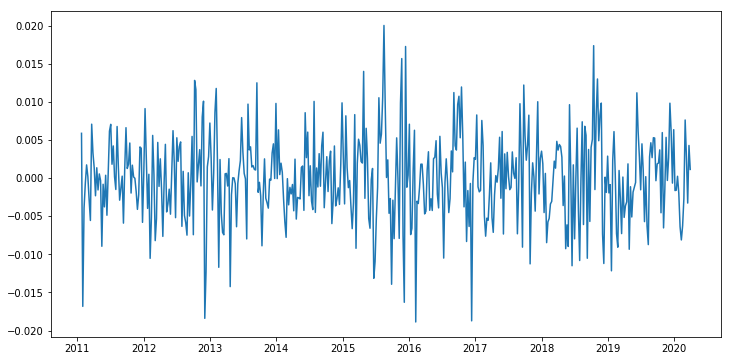

In [240]:
%matplotlib inline
yy=y.rolling(8).mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_week['time'][2:],yy.diff()[2:])


In [249]:
result = adfuller(yy.diff()[8:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.350812
p-value: 0.000000


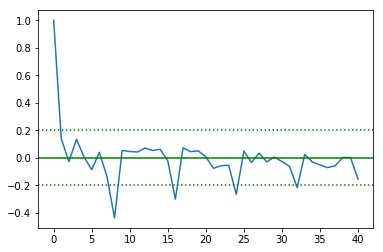

In [252]:
yd=yy.diff()[8:]
plt.plot(pacf(yd))
plt.axhline(y=0.2,color='green',ls=":")
plt.axhline(y=-0.2,color='green',ls=":")
plt.axhline(y=0,color='green')

In [323]:
num_pre=16
num_roll=6
col=(x_week[41]/x_week['tot']).rolling(num_roll).mean()[num_roll-1:]
data=pd.DataFrame(columns=['year','week','min','max','mean','std'])
data['week']=x_week['time'].dt.week[num_roll-1+num_pre:]
data.reset_index(inplace=True)
data=data.drop(columns=['index'])
data.head()

(467, 6)

In [335]:
for i in range(data.shape[0]):
    data.iloc[i]['year']=(x_week['time'][num_roll-1+num_pre+i].year )#.copy()
    data.iloc[i]['week']=(x_week['time'].dt.week[num_roll-1+num_pre+i])#.copy()
    stat=x_week[i:i+num_roll].describe()
    data.iloc[i]['min']=stat.min
    data.iloc[i]['max']=stat.max
    data.iloc[i]['mean']=stat.mean
    data.iloc[i]['std']=stat.std
    #data.iloc[i]['min']=stat.min
    

data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

KeyboardInterrupt: 

In [363]:
#stat=x_week[i:i+num_roll][41].describe()
#x_week[41]/x_week['tot'].rolling(2).mean()

In [365]:
feature=pd.read_csv("color_pop_weekly_features_41.csv")[:-4]

In [372]:
y=(x_week[41]/x_week['tot']).rolling(num_roll).mean()[num_roll-1+num_pre:][4:]
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [411]:
result = adfuller(y[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.389225
p-value: 0.144801


In [434]:
model = ARIMA(y, order=(3,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  462
Model:                 ARIMA(3, 1, 3)   Log Likelihood                1678.736
Method:                       css-mle   S.D. of innovations              0.006
Date:                Mon, 15 Jun 2020   AIC                          -3341.473
Time:                        17:12:33   BIC                          -3308.388
Sample:                             1   HQIC                         -3328.447
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.336      0.737      -0.001       0.001
ar.L1.D.y      0.0530      0.044      1.219      0.223      -0.032       0.138
ar.L2.D.y     -0.0113      0.043     -0.261      0.7

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


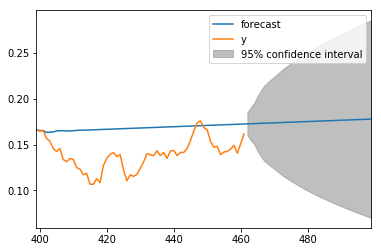

In [435]:
model_fit.plot_predict(start=400,end=500,dynamic=True)
plt.show()

In [428]:
model_fit.plot_predict?

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


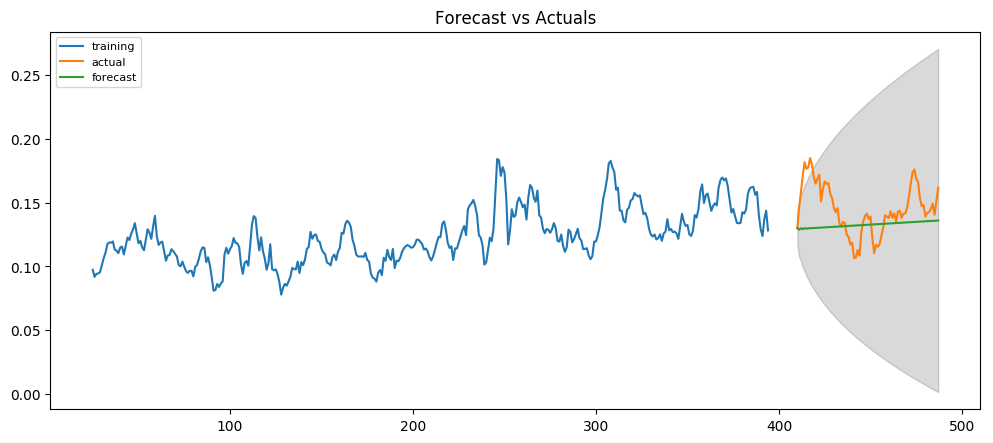

In [426]:
train=y[:370]
test=y[385:]
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(78, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [457]:
y=pd.read_csv("pro_color_time_for_ts.csv")
#feature
feature=x_week.copy()#[41]/x_week['tot']
#fig, ax = plt.subplots(figsize=(12,6))
#ax.plot(feature.rolling(4).mean())
feature=feature[['time',41]]#.head()
feature[41]=x_week[41]/x_week['tot']

In [494]:
colname=['month']
colname.extend([str(i) for i in range(8)])
data=pd.DataFrame(columns=colname)
data['month']=y.time[60:]
data.reset_index(inplace=True)

In [508]:
#y.time[34]
#data['month']


In [509]:
for i in range(data.shape[0]):#[:5]:
    month=pd.to_datetime(data['month'].iloc[i])
    start=month - pd.DateOffset(months=2)
    end=month
    print(start,end)
    xs=feature[pd.to_datetime(feature['time'])>=start]
    xs=xs[pd.to_datetime(xs['time'])<end].iloc[-8:]
    xs.reset_index(inplace=True)
    print(xs)
    print('')
    for j in range(8):
        data[str(j)].iloc[i]=xs.iloc[j][41]

2012-01-01 00:00:00 2012-03-01 00:00:00
   index       time        41
0     58 2012-01-09  0.126941
1     59 2012-01-16  0.127774
2     60 2012-01-23  0.127765
3     61 2012-01-30  0.128709
4     62 2012-02-06  0.108976
5     63 2012-02-13  0.097896
6     64 2012-02-20  0.109212
7     65 2012-02-27  0.109290

2012-02-01 00:00:00 2012-04-01 00:00:00
   index       time        41
0     62 2012-02-06  0.108976
1     63 2012-02-13  0.097896
2     64 2012-02-20  0.109212
3     65 2012-02-27  0.109290
4     66 2012-03-05  0.112666
5     67 2012-03-12  0.113202
6     68 2012-03-19  0.111353
7     69 2012-03-26  0.109177

2012-03-01 00:00:00 2012-05-01 00:00:00
   index       time        41
0     67 2012-03-12  0.113202
1     68 2012-03-19  0.111353
2     69 2012-03-26  0.109177
3     70 2012-04-02  0.110951
4     71 2012-04-09  0.107447
5     72 2012-04-16  0.094050
6     73 2012-04-23  0.095211
7     74 2012-04-30  0.102398

2012-04-01 00:00:00 2012-06-01 00:00:00
   index       time        

2014-04-01 00:00:00 2014-06-01 00:00:00
   index       time        41
0    175 2014-04-07  0.099068
1    176 2014-04-14  0.097396
2    177 2014-04-21  0.087326
3    178 2014-04-28  0.084482
4    179 2014-05-05  0.091040
5    180 2014-05-12  0.087314
6    181 2014-05-19  0.100253
7    182 2014-05-26  0.106353

2014-05-01 00:00:00 2014-07-01 00:00:00
   index       time        41
0    180 2014-05-12  0.087314
1    181 2014-05-19  0.100253
2    182 2014-05-26  0.106353
3    183 2014-06-02  0.091390
4    184 2014-06-09  0.112398
5    185 2014-06-16  0.104924
6    186 2014-06-23  0.110999
7    187 2014-06-30  0.121418

2014-06-01 00:00:00 2014-08-01 00:00:00
   index       time        41
0    184 2014-06-09  0.112398
1    185 2014-06-16  0.104924
2    186 2014-06-23  0.110999
3    187 2014-06-30  0.121418
4    188 2014-07-07  0.103731
5    189 2014-07-14  0.105240
6    190 2014-07-21  0.090959
7    191 2014-07-28  0.100795

2014-07-01 00:00:00 2014-09-01 00:00:00
   index       time        

KeyboardInterrupt: 

In [498]:
xs=feature[pd.to_datetime(feature['time'])>=start]
xs=xs[pd.to_datetime(xs['time']).all()<end]

TypeError: invalid_op() got an unexpected keyword argument 'skipna'

In [516]:
y

,Unnamed: 0,time,0,1,2,3,4,5,6,7,...,127,128,129,130,131,132,133,134,135,tot
0,0,2007/03,150.0,0.0,0.0,0.0,0.0,0.0,0.0,1101.0,...,2639.0,881.0,9.0,0.0,30.0,0.0,5.0,0,0.0,115831.0
1,1,2007/04,152.0,0.0,0.0,0.0,1.0,0.0,10.0,3403.0,...,9.0,1712.0,42.0,38.0,48.0,0.0,0.0,0,1.0,124027.0
2,2,2007/05,4283.0,0.0,0.0,4.0,0.0,10.0,639.0,14071.0,...,16107.0,2585.0,1648.0,0.0,2.0,0.0,366.0,0,2.0,600383.0
3,3,2007/06,3521.0,0.0,0.0,0.0,0.0,12.0,3986.0,34287.0,...,23894.0,11914.0,988.0,0.0,41.0,1.0,828.0,0,2.0,1238626.0
4,4,2007/07,7966.0,0.0,971.0,0.0,0.0,8.0,5570.0,57918.0,...,41176.0,31355.0,5491.0,0.0,580.0,19.0,5338.0,0,0.0,2210772.0
5,5,2007/08,4159.0,0.0,0.0,1432.0,12.0,279.0,1460.0,27094.0,...,47999.0,7372.0,8279.0,0.0,1.0,0.0,8539.0,0,513.0,1548341.0
6,6,2007/09,4862.0,0.0,8.0,17.0,0.0,4.0,4004.0,69878.0,...,26233.0,13521.0,1020.0,0.0,565.0,3.0,2542.0,0,2.0,2079168.0
7,7,2007/10,3670.0,0.0,9.0,19.0,22.0,0.0,17006.0,110972.0,...,64327.0,38149.0,2479.0,0.0,48.0,4537.0,2148.0,0,197.0,3233361.0
8,8,2007/11,3967.0,0.0,0.0,21.0,6.0,546.0,9163.0,102878.0,...,37048.0,13805.0,3834.0,5.0,4146.0,420.0,4511.0,0,415.0,2199749.0
9,9,2007/12,6890.0,0.0,0.0,0.0,185.0,0.0,178.0,43541.0,...,14947.0,17474.0,5015.0,0.0,115.0,0.0,2739.0,0,36.0,1591358.0


In [459]:
feature[41]=feature[41].rolling(4).mean()

In [488]:
#pd.to_datetime(data['month']) - pd.DateOffset(months=1)
np.sum(feature['time'].isna())

0

In [512]:
#feature

In [436]:
#X_train, X_valid, y_train, y_valid = train_test_split(feature, y, 
#                                                                train_size=0.8, test_size=0.2,
#                                                                random_state=1)

X_train=feature[1:370]
y_train=y.diff()[1:370]
X_valid=feature[370:]
y_valid=y.diff()[370:]
model = RandomForestRegressor(n_estimators=20,min_samples_leaf=2, random_state=1)
model.fit(X_train, y_train)
    
preds = model.predict(X_valid)
r2 = r2_score(y_valid, preds)

#get_importance(feature,y)

In [416]:
#plt.plot(range(93),y_valid)
#plt.plot(range(93),preds)

#X_valid
#y_valid.shape
#y.shape
r2

0.06288328631420903

In [374]:
def get_importance(x,y,year=2014,random_state=0,n_estimators=100):   
    
    
    X_train, X_valid, y_train, y_valid = train_test_split(x, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=random_state)

    model = RandomForestRegressor(n_estimators=n_estimators,min_samples_leaf=2, random_state=random_state)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_valid)
    r2 = r2_score(y_valid, preds)
    
    print('R2 score:', r2)

    
    #importance=pd.DataFrame(data= {'importance':model.feature_importances_}, index=col_x)
    return r2#importance,r2


In [514]:
x_week.to_csv("project_color_pop_weekly.csv")

In [517]:
x_week.tail()

,time,0,1,2,3,4,5,6,7,8,...,127,128,129,130,131,132,133,134,135,tot
483,2020-03-02,1822.0,0.0,0.0,0.0,0.0,0.0,293.0,19839.0,0,...,5163.0,1216.0,999.0,805.0,81.0,1.0,350.0,0,0.0,841438.0
484,2020-03-09,1456.0,0.0,0.0,7.0,1.0,124.0,394.0,38189.0,0,...,9911.0,3650.0,132.0,0.0,56.0,0.0,368.0,0,74.0,825012.0
485,2020-03-16,703.0,0.0,0.0,0.0,0.0,17.0,1091.0,43715.0,0,...,8502.0,5943.0,646.0,0.0,1.0,0.0,290.0,0,1.0,972149.0
486,2020-03-23,1219.0,0.0,35.0,1.0,0.0,0.0,3535.0,35470.0,0,...,4078.0,2784.0,472.0,0.0,19.0,10.0,396.0,0,5.0,809561.0
487,2020-03-30,44.0,0.0,0.0,0.0,0.0,0.0,1.0,14264.0,0,...,549.0,294.0,344.0,0.0,0.0,0.0,48.0,0,0.0,142200.0


In [256]:
model = ARIMA(yd, order=(8,1,8))
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [55]:
keep=['time']
keep.extend([str(i) for i in range(949)])
x_month=x[keep].copy()
#for i in range(len(dat['time'])):
#    x_month['time'][i]=dat['time'][i][:-3]

In [62]:
#x_month=x_month.reset_index()
#x_month['time']=x_month['time'][:-3]#.groupby('time').sum()

In [181]:
tot=x_week.sum(axis=0)
color_count=tot
color_count=color_count/color_count['tot']
rank=color_count.sort_values(ascending=False)[1:]
#rank


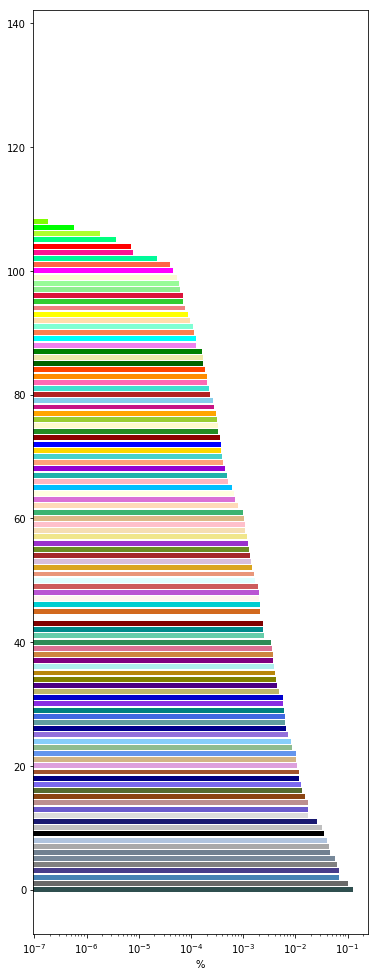

In [621]:
color_rank_index=rank.keys()

fig, ax = plt.subplots(figsize=(6,17))
for i in np.arange(136):
    #print(i)
    #print(rank[color_rank_index[i]])
    #print(color_136[color_rank_index[i]])
    ax.barh(int(i),(rank[color_rank_index[i]]),color=color_136[color_rank_index[i]]/255.)
    #plt.yticks([i],labels=colorcode['colorname'])
ax.set_xscale('log')
plt.xlabel('%')
plt.show()

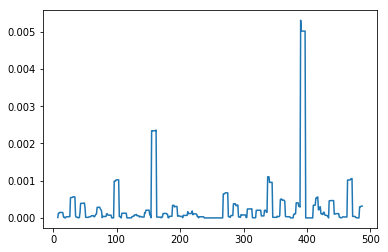

In [634]:
plt.plot((x_week[(color_rank_index[80])]/x_week['tot']).rolling(8).mean())

In [651]:
#np.mean(x_week[(color_rank_index[20])]/x_week['tot'])*100
np.log(rank)+20#[-40:])#*100

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


41     17.924760
46     17.731429
126    17.304015
40     17.300042
56     17.227114
77     17.134229
123    16.935155
30     16.885689
78     16.796171
7      16.674008
120    16.580593
94     16.328298
52     15.947287
122    15.946851
114    15.944654
116    15.805389
34     15.705769
90     15.663113
98     15.551052
119    15.540414
112    15.476601
127    15.410673
23     15.404165
39     15.235692
76     15.220352
88     15.070276
27     14.986599
19     14.939774
115    14.929931
128    14.880117
         ...    
57      6.772842
80      5.613076
20      4.503594
26          -inf
12          -inf
47          -inf
95          -inf
96          -inf
83          -inf
82          -inf
134         -inf
49          -inf
8           -inf
9           -inf
113         -inf
99          -inf
13          -inf
62          -inf
14          -inf
15          -inf
72          -inf
33          -inf
53          -inf
67          -inf
58          -inf
65          -inf
64          -inf
124         -i

In [663]:
#dat_rf=pd.read_csv("color_weekly_feature_to_month_41.csv")

random_state=1
n_estimators=11
#X_train, X_valid, y_train, y_valid = train_test_split(x.drop(columns='month'), y, 
#                                                            train_size=0.8, test_size=0.2,
#                                                            random_state=random_state)


xx=x.drop(columns='month')
xx[xx.columns[:8]]=np.log(xx[xx.columns[:8]])+20
X_train=xx.iloc[:77]
y_train=np.log(y.iloc[:77])+20
X_valid=xx.iloc[80:]
y_valid=np.log(y.iloc[80:])+20

model = RandomForestRegressor(n_estimators=n_estimators,min_samples_leaf=2, random_state=random_state)
model.fit(X_train, y_train)

preds = model.predict(X_valid)
r2 = r2_score(y_valid, preds)

print('R2 score:', r2)
#preds = model.predict(X_train)
#r2 = r2_score(y_train, preds)
r2

R2 score: 0.22068645482599825


0.22068645482599825

In [667]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})
forecast_accuracy(preds,y_valid)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.005890881440328979,
 'me': -0.008691666422853258,
 'mae': 0.10638637868474507,
 'mpe': -0.00042584127419437575,
 'rmse': 0.13082967567681725,
 'acf1': 0.9213111426100234,
 'corr': 0.49489983307691493,
 'minmax': 0.005867825337960375}

(17,)


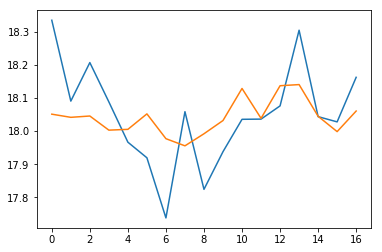

In [665]:
print(preds.shape)
plt.plot(range(17),y_valid)
plt.plot(range(17),preds)
#plt.ylim([0.08,0.20])

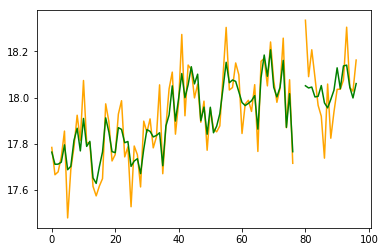

In [666]:
preds_train = model.predict(X_train)
#r2 = r2_score(y_train, preds)

plt.plot(range(77),y_train,color='orange')
plt.plot(range(77),preds_train,color='g')
plt.plot(range(80,97),y_valid,color='orange')
plt.plot(range(80,97),preds,color='g')

In [670]:
rank.to_csv('color_rank_136.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [555]:
dat_rf=pd.read_csv("color_weekly_feature_to_month_41.csv")

In [557]:
#dat_rf
#yy=pd.read_csv("pro_color_time_for_ts.csv")#dat_rf['y']

In [567]:
x=dat_rf.drop(columns=['Unnamed: 0','index','y']).copy()
y=dat_rf['y'].copy()

In [574]:
x['year']=x['month'].apply(lambda x: int(x[:4])

In [578]:
x['m']=x['month'].apply(lambda x: int(x[-2:]))

In [581]:
x.shape

(97, 11)

In [3]:
import numpy as np

print(np.sqrt((255-192)**2+(248-195)**2+(25**2)))


86.0406880493177


In [2]:
print(np.sqrt((237-51)**2+(25-22)**2))

186.02419197512995


In [6]:
(1-np.cos((237-51)*np.pi/180))*3**2

17.95069705831446

In [8]:
print(np.sqrt((179-26)**2+(192-64)**2))

199.4818287463798


In [13]:
hex2rgb("#b1cc9f")

array([177, 204, 159], dtype=uint8)

In [16]:
hex2rgb("#00aaff")

array([  0, 170, 255], dtype=uint8)